In [3]:
from estnltk.text import Text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Finds the average read count of the article with given title length. Uses word_count_title.csv, which is generated by python/count_words.py.

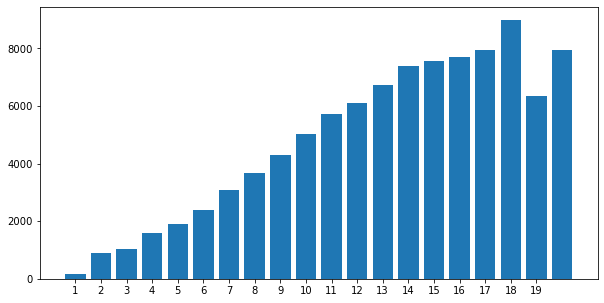

In [4]:
word_count_title = pd.read_csv("../data/word_count_title.csv", sep=",", names=['id', 'datetime', 'title', 'content', 'share_count',
                    'comment_count', 'read_count', 'author', 'word_count'], encoding="utf-8")
word_count_title = word_count_title.sort_values(by="read_count", ascending=False)

title_length = word_count_title.word_count.value_counts().to_frame()
title_length.columns = ['amount']
title_length

title_length['title_length'] = title_length.index

def count_reads(row):
    return word_count_title[word_count_title['word_count'] == row.title_length].read_count.sum()

def find_avg_read_count(row):
    return row.read_count / row.amount
    
title_length['read_count'] = title_length.apply(lambda i: count_reads(i), axis=1)

bins = pd.DataFrame({'title_length': range(1,21), 'amount': [0] * 20, 'read_count': [0] * 20})
                    
for index, row in title_length.iterrows():
    for i, r in bins.iterrows():
        if index == r.title_length:
            bins.loc[i, 'amount'] = bins.loc[i, 'amount'] + row.amount
            bins.loc[i, 'read_count'] = bins.loc[i, 'read_count'] + row.read_count
            
sorted = bins.sort_values(by='title_length')

sorted['avg_read_count'] = sorted.apply(lambda i: find_avg_read_count(i), axis=1)

plt.figure(figsize=[10,5])
plt.bar(sorted.title_length, sorted.avg_read_count, width=0.8)

plt.xticks(range(1, 20))

sorted

pd.DataFrame({'title_length': sorted.title_length, 'avg_read_count': sorted.avg_read_count}).to_csv('titlelength_avgread.csv', sep='\t')

Finds the average comment count of the article with length x to (x+100). Uses content_words.csv which is also made by python/count_words.py.

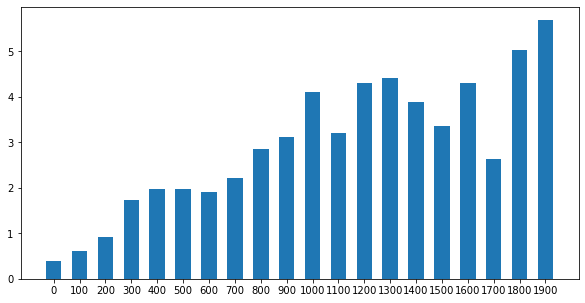

In [6]:
content_words = pd.read_csv("../data/content_words.csv", sep=",", names=['id', 'datetime', 'title', 'content', 'share_count',
                    'comment_count', 'read_count', 'author', 'content_words'], encoding="utf-8")
content_words = content_words.sort_values(by="read_count", ascending=False)

def count_comments(row):
    return content_words[content_words['content_words'] == row.content_length].comment_count.sum()

content_length = content_words.content_words.value_counts().to_frame()
content_length.columns = ['amount']
content_length['content_length'] = content_length.index
#plt.scatter(content_words.content_words, content_words.read_count)
content_length['comment_count'] = content_length.apply(lambda i: count_comments(i), axis=1)

content_length

def find_avg_comment_count(row):
    return row.comment_count / row.amount

bins = pd.DataFrame({'content_length': range(0,2000,100), 'amount': [0] * 20, 'comment_count': [0] * 20})

for index, row in content_length.iterrows():
    for i, r in bins.iterrows():
        if index >= r.content_length and index < r.content_length + 100:
            bins.loc[i, 'amount'] = bins.loc[i, 'amount'] + row.amount
            bins.loc[i, 'comment_count'] = bins.loc[i, 'comment_count'] + row.comment_count
    
bins['avg_comment_count'] = bins.apply(lambda i: find_avg_comment_count(i), axis=1)

sorted = bins.sort_values(by='content_length')

sorted

plt.figure(figsize=[10,5])
plt.bar(sorted.content_length, sorted.avg_comment_count, width=60)
plt.xticks(range(0, 2000, 100))

pd.DataFrame({'title_length': sorted.content_length, 'avg_read_count': sorted.avg_comment_count}).to_csv('contentlength_avgcomment.csv', sep='\t')

Finds the average share count of the article with length x to (x+100). Uses content_words.csv which is also made by python/count_words.py.

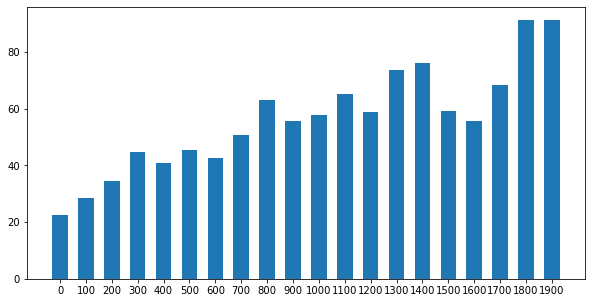

In [11]:
content_words = pd.read_csv("../data/content_words.csv", sep=",", names=['id', 'datetime', 'title', 'content', 'share_count',
                    'comment_count', 'read_count', 'author', 'content_words'], encoding="utf-8")
content_words = content_words.sort_values(by="read_count", ascending=False)

def count_comments(row):
    return content_words[content_words['content_words'] == row.content_length].share_count.sum()

content_length = content_words.content_words.value_counts().to_frame()
content_length.columns = ['amount']
content_length['content_length'] = content_length.index
#plt.scatter(content_words.content_words, content_words.read_count)
content_length['share_count'] = content_length.apply(lambda i: count_comments(i), axis=1)

def find_avg_share_count(row):
    return row.share_count / row.amount

bins = pd.DataFrame({'content_length': range(0,2000,100), 'amount': [0] * 20, 'share_count': [0] * 20})

for index, row in content_length.iterrows():
    for i, r in bins.iterrows():
        if index >= r.content_length and index < r.content_length + 100:
            bins.loc[i, 'amount'] = bins.loc[i, 'amount'] + row.amount
            bins.loc[i, 'share_count'] = bins.loc[i, 'share_count'] + row.share_count
    
bins['avg_share_count'] = bins.apply(lambda i: find_avg_share_count(i), axis=1)

sorted = bins.sort_values(by='content_length')

sorted

plt.figure(figsize=[10,5])
plt.bar(sorted.content_length, sorted.avg_share_count, width=60)
plt.xticks(range(0, 2000, 100))

pd.DataFrame({'title_length': sorted.content_length, 'avg_read_count': sorted.avg_share_count}).to_csv('contentlength_avgshare.csv', sep='\t')